# 简单线性回归（手动梯度下降）

### 0.引入依赖

In [36]:
import numpy as np
import matplotlib.pyplot as plt

### 1.导入数据（data.csv）

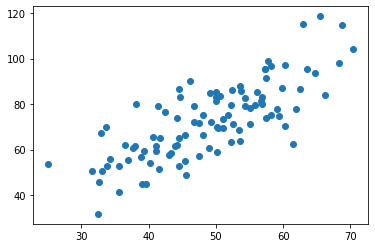

In [37]:
points = np.genfromtxt('e:/input/data.csv',delimiter=',') # 返回一个二维的array
len(points)

# 提取两列数据，分别作为x,y
x = points[:,0]
y = points[:,1]

# 用plt散点图
plt.scatter(x,y)
plt.show()

### 2.定义损失函数

In [38]:
# 损失函数是系数的函数，最小二乘使用平方损失，这里可以使用任意
def compute_cost(w,b,points):
    total_cost = 0
    M = len(points)
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        total_cost += (y- w * x - b) ** 2
    return total_cost/M #python的除数直接是float类型


### 3.定义超参数

In [43]:
# 损失函数是系数的函数
# 梯度下降是迭代法，需要定义初始化参数，步长，迭代次数 
alpha = 0.0001
init_w = 0
init_b = 0
num_iter = 20


### 4.定义算法拟合函数

In [56]:
# 梯度下降
def grad_desc(points,init_w,init_b,alpha,num_iter):
    w = init_w
    b = init_b
    
    # 定义一个list保存所有损失函数值，用来显示下降的过程
    cost_list = []
    temp_wb = []
    
    for i in range(num_iter):
        cost_list.append(compute_cost(w,b,points)) #当前损失
        w,b = step_grad_desc(w,b,alpha,points) #计算每一步梯度
        temp_wb.append((w,b))
            
    return [w,b,cost_list,temp_wb]   


# 根据公式计算当前梯度：
def step_grad_desc(current_w,current_b,alpha,points):
    sum_grad_w = 0
    sum_grad_b = 0
    M = len(points)
    
    #对每一个点，带入公式求和
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        sum_grad_w += (current_w * x + current_b - y) * x
        sum_grad_b += current_w * x +current_b - y
    
    #用公式求当前梯度(偏导数)
    grad_w = 2/M * sum_grad_w
    grad_b = 2/M * sum_grad_b
    
    #梯度下降，更新当前w和b
    update_w = current_w - alpha * grad_w
    update_b = current_b - alpha * grad_b
    
    return update_w, update_b
    

### 5.运行梯度下降算法计算最优w和b

In [60]:
w,b,cost_list,temp_wb= grad_desc(points, init_w, init_b, alpha, num_iter) # 解构赋值
print("w is : ",w)
print("b is : ",b)

# 最小二乘法w=1.33,b=7.99
print("cost is: ", cost_list)
print("\n")
print("w and b is : ", temp_wb)

w is :  1.478895662279729
b is :  0.030269517287775896
cost is:  [5565.107834483211, 1484.5865574086483, 457.85425757376686, 199.50998572553866, 134.50591058200533, 118.14969342239948, 114.03414906038148, 112.99857731713661, 112.73798187568467, 112.67238435909101, 112.65585181499748, 112.65166489759582, 112.6505843615011, 112.65028544701501, 112.6501832029397, 112.65013044507194, 112.65009013922885, 112.65005296694635, 112.65001658353181, 112.64998039901866]


w and b is :  [(0.7370702973591055, 0.014547010110737297), (1.106795454351516, 0.021873962959596406), (1.2922546649131117, 0.02557922432129313), (1.385283255651245, 0.027467789559144345), (1.4319472323843205, 0.028445071981738953), (1.4553540088980408, 0.02896524076647861), (1.4670946177201354, 0.02925611412604669), (1.4729832982243762, 0.02943196916380712), (1.4759365618962286, 0.029550129024383063), (1.4774173755483797, 0.02963934787473238), (1.4781595857319891, 0.029714049245227036), (1.4785313011122556, 0.029781468199526512),

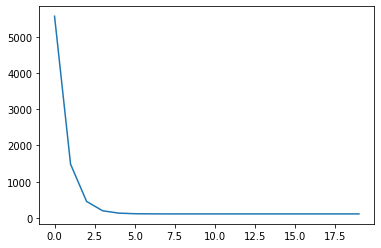

In [58]:
### 5. 画出损失
# 收敛还蛮快的
plt.plot(cost_list)

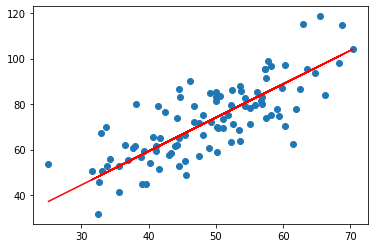

In [51]:
plt.scatter(x,y)
plt.plot(x,w*x+b,c='r')